## build a model to predict whether or not a passenger survived in titanic disaster :

In [2]:
#import Libraries

In [1]:
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# WORKING DIRECTORY :-

In [2]:
url="https://raw.githubusercontent.com/parikshitgurjar/Classification-Project-on-Titanic-Dataset/main/titanic%20dataset.csv"

In [ ]:
#LOAD THE DATA : TITANIC DATASET :-

In [4]:
titanic_data=pd.read_csv(url)

In [5]:
len(titanic_data) #891 rows are their in our training data

891

In [6]:
titanic_data.head() #our target column is "Survived"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#we observed that missing values found in Age,Cabin and Ebarked.

## Data Analysis
#### Import Seaborn for visually analysing the data

#### Find out how many survived vs Died using countplot method of seaboarn

In [17]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

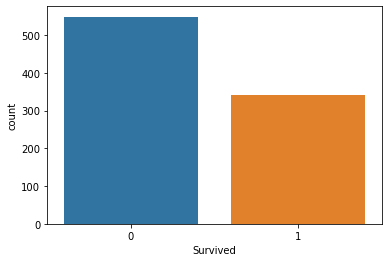

In [18]:
sns.countplot(x='Survived',data=titanic_data) # 0 : Not Survived and 1: Survived

In [19]:
# Now, to see how many Male and Female Passengers Survived :-

<AxesSubplot:xlabel='Survived', ylabel='count'>

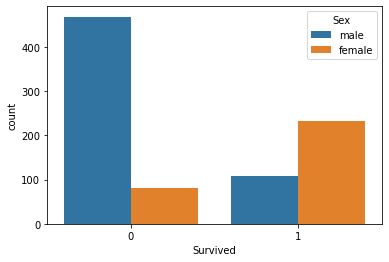

In [20]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [21]:
# CHECKING THE NULL VALUES IN MY DATASET :- 

In [23]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#VISUALISING NULL VALUES USING HEATMAP :-

<AxesSubplot:>

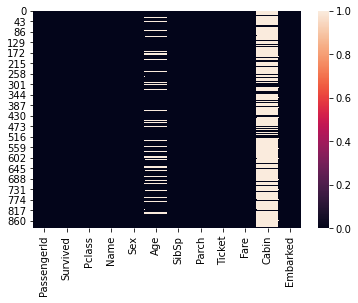

In [25]:
sns.heatmap(titanic_data.isnull())

##### find the Percentage (%) of null values in age column  : If Null Values are more then 30% we will remove that 
##### column because it will lead to Overfitting if we try to fill those missing values :

In [26]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100    # only 20% missing values Present in Age Column

19.865319865319865

In [27]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100    # only 77% missing values Present in Age Column 

77.10437710437711

In [ ]:
# We will Drop the Cabin Column 

In [28]:
#find the distribution for the age column (only for Numerical Columns) :-

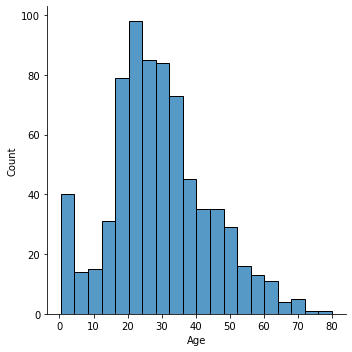

In [29]:
sns.displot(x='Age',data=titanic_data)

In [ ]:
#  We observed that most Passengers belong to the Age Group of (20-40).

## Data Cleaning
###  Fill the missing values
### we will fill the missing values for age. In order to fill missing values we use fillna method.
### For now we will fill the missing age by taking average of all age

In [30]:
titanic_data.Age.mean()

29.69911764705882

In [31]:
# Now, filling the missing values of Age Column by its Mean :-

In [32]:
titanic_data.Age.fillna(titanic_data['Age'].mean(),inplace=True)

In [33]:
#Verify Missing Values of Age :

In [34]:
titanic_data['Age'].isnull().sum() # all missing values replaced.

0

In [35]:
# DROP the CABIN COLUMN :

In [36]:
titanic_data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

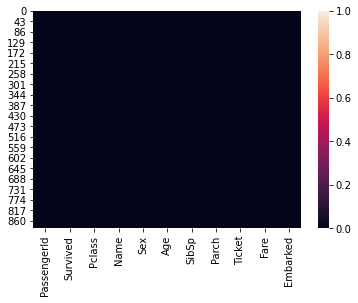

In [37]:
sns.heatmap(titanic_data.isna())

### Preaparing Data for Model
## No we will require to convert all non-numerical columns to numeric.
### Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method :-

In [38]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### We can see, Name, Sex, Ticket and Embarked are non-numerical.
#### It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it.
#### For Now we would convert Sex Column to dummies numerical values**

In [39]:
#convert sex column to numerical values

In [40]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [41]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
# Save this Column by name "Gender" in our DataSet :
titanic_data['Gender']=gender

In [43]:
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0


In [44]:
#drop the columns which are not required

In [45]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [46]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### Seperate Dependent and Independent variables

In [47]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

## Data Modelling
### Building Model using Logestic Regression

### Build the model

In [49]:
#import train test split method

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [52]:
#import Logistic  Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
#Fit  Logistic Regression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(x_train,y_train)

C:\Users\AB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
#Our Dataset is Trained Now.

In [59]:
#Now Predict on x_test:-

In [60]:
predict=lr.predict(x_test)

In [ ]:
# So , till now our Data Anylysis, Data Cleaning and Data Modeling is Completed.
# Now, its time to Testing the Data

## Testing
### See how our model is performing

## #print confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


In [ ]:
# We can observe that the False Positive and False Negative is Low. which is a Good Sign.

### import classification report

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



###### Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or by using other model

### Note:
###### Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
###### Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall.